# Exploring Dandiset 000690: Allen Institute Openscope - Vision2Hippocampus project

**Important:** This notebook was AI-generated and has not been fully verified. Use caution when interpreting the code or results.

This notebook provides an overview of Dandiset 000690, which contains data from the Allen Institute Openscope - Vision2Hippocampus project.

The Dandiset is available at: https://dandiarchive.org/dandiset/000690

This notebook will cover the following:

1.  Loading the Dandiset using the DANDI API
2.  Loading an NWB file from the Dandiset
3.  Exploring and visualizing data from the NWB file

Required packages:

*   pynwb
*   h5py
*   remfile
*   matplotlib
*   seaborn

In [1]:
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000690")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List the assets in the Dandiset
assets = list(dandiset.get_assets())
print(f"\nFound {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Allen Institute Openscope - Vision2Hippocampus project
Dandiset URL: https://dandiarchive.org/dandiset/000690/0.250326.0015

Found 156 assets in the dataset

First 5 assets:
- sub-692077/sub-692077_ses-1300222049_probe-4_ecephys.nwb (ID: b0ea16d5-42eb-4b56-87cc-7d7b7efab4db)
- sub-692077/sub-692077_ses-1300222049_probe-3_ecephys.nwb (ID: e0ad1921-75f1-43ed-aa86-8e1a45a9f49d)
- sub-692077/sub-692077_ses-1300222049_probe-2_ecephys.nwb (ID: 97712120-158d-492a-ae21-61515335bc18)
- sub-692077/sub-692077_ses-1300222049_probe-0_ecephys.nwb (ID: de12ccea-83a7-4d7f-937c-4c02e4d3bf44)
- sub-692077/sub-692077_ses-1300222049.nwb (ID: 8ae65111-a130-47fc-a108-55e695374739)


## Loading and exploring an NWB file

We will load the following NWB file: `sub-692072/sub-692072_ses-1298465622.nwb`

This file can be accessed via the following URL: `https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/`

Here's how to load the NWB file and access some of its metadata:

In [2]:
import pynwb
import h5py
import remfile

# Load
url = "https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

nwb # (NWBFile)
print(f"Session description: {nwb.session_description}") # (str) Data and metadata for an Ecephys session
print(f"Identifier: {nwb.identifier}") # (str) 1298465622
print(f"Session start time: {nwb.session_start_time}") # (datetime) 2023-09-21T00:00:00-07:00
print(f"Timestamps reference time: {nwb.timestamps_reference_time}") # (datetime) 2023-09-21T00:00:00-07:00
print(f"File create date: {nwb.file_create_date}") # (list) [datetime.datetime(2025, 2, 25, 16, 36, 10, 235851, tzinfo=tzoffset(None, -28800))]

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session description: Data and metadata for an Ecephys session
Identifier: 1298465622
Session start time: 2023-09-21 00:00:00-07:00
Timestamps reference time: 2023-09-21 00:00:00-07:00
File create date: [datetime.datetime(2025, 2, 25, 16, 36, 10, 235851, tzinfo=tzoffset(None, -28800))]


## Exploring the contents of the NWB file

The NWB file contains various types of data, including eye tracking, running wheel data, and stimulus information.

Here's a summary of some of the key data interfaces:

*   `nwb.acquisition['EyeTracking']`: Eye tracking data
    *   `nwb.acquisition['EyeTracking'].spatial_series['corneal_reflection_tracking']`: Corneal reflection tracking data
    *   `nwb.acquisition['EyeTracking'].spatial_series['eye_tracking']`: Eye tracking data
    *   `nwb.acquisition['EyeTracking'].spatial_series['pupil_tracking']`: Pupil tracking data
    *   `nwb.acquisition['EyeTracking'].likely_blink`: Likely blink timeseries data
*   `nwb.acquisition['raw_running_wheel_rotation']`: Raw running wheel rotation data
*   `nwb.acquisition['running_wheel_signal_voltage']`: Running wheel signal voltage data
*   `nwb.acquisition['running_wheel_supply_voltage']`: Running wheel supply voltage data
*   `nwb.processing['running']`: Running speed data
    *   `nwb.processing['running'].data_interfaces['running_speed']`: Running speed data
    *   `nwb.processing['running'].data_interfaces['running_speed_end_times']`: Running speed end times data
    *   `nwb.processing['running'].data_interfaces['running_wheel_rotation']`: Running wheel rotation data
*   `nwb.processing['stimulus']`: Stimulus times processing
    *   `nwb.processing['stimulus'].data_interfaces['timestamps']`: Stimulus timestamps data
*   `nwb.electrode_groups`: Electrode group information
*   `nwb.devices`: Device information
*   `nwb.intervals`: Experimental intervals
*   `nwb.units`: Units data

You can explore this file in neurosift here: https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/&dandisetId=000690&dandisetVersion=draft

## Loading and visualizing eye tracking data

Let's load and visualize some eye tracking data from the NWB file.

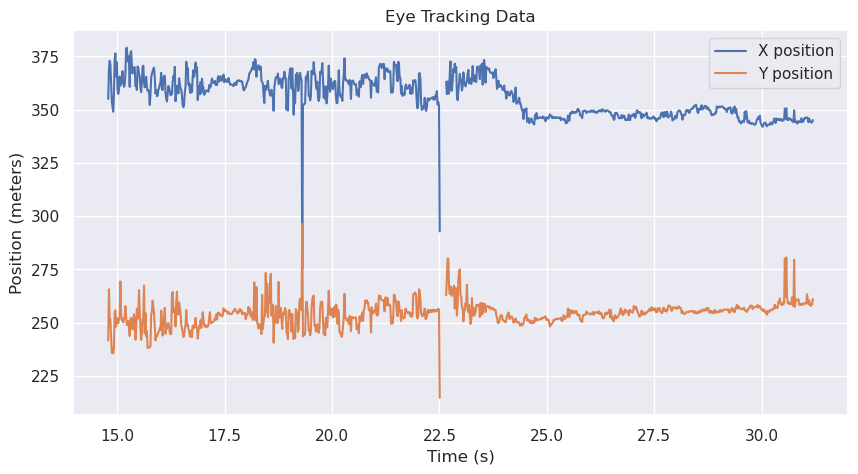

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

# Load eye tracking data
eye_tracking_data = nwb.acquisition['EyeTracking'].spatial_series['eye_tracking'].data
eye_tracking_timestamps = nwb.acquisition['EyeTracking'].spatial_series['eye_tracking'].timestamps[:]

# Plot the first 1000 data points
plt.figure(figsize=(10, 5))
plt.plot(eye_tracking_timestamps[:1000], eye_tracking_data[:1000, 0], label='X position')
plt.plot(eye_tracking_timestamps[:1000], eye_tracking_data[:1000, 1], label='Y position')
plt.xlabel('Time (s)')
plt.ylabel('Position (meters)')
plt.title('Eye Tracking Data')
plt.legend()
plt.show()

## Loading and visualizing running speed data

Now, let's load and visualize some running speed data.

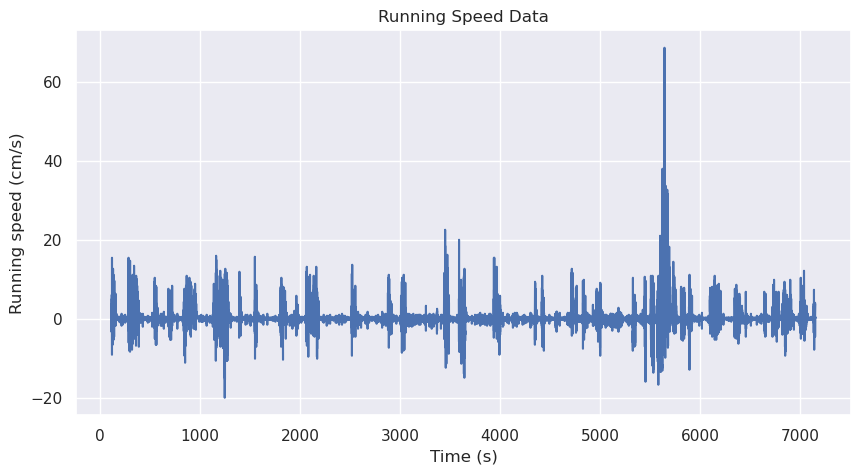

In [4]:
# Load running speed data
running_speed_data = nwb.processing['running'].data_interfaces['running_speed'].data[:]
running_speed_timestamps = nwb.processing['running'].data_interfaces['running_speed'].timestamps[:]

# Plot the running speed data
plt.figure(figsize=(10, 5))
plt.plot(running_speed_timestamps, running_speed_data)
plt.xlabel('Time (s)')
plt.ylabel('Running speed (cm/s)')
plt.title('Running Speed Data')
plt.show()

## Loading and visualizing stimulus timestamps

Finally, let's load and visualize the stimulus timestamps.

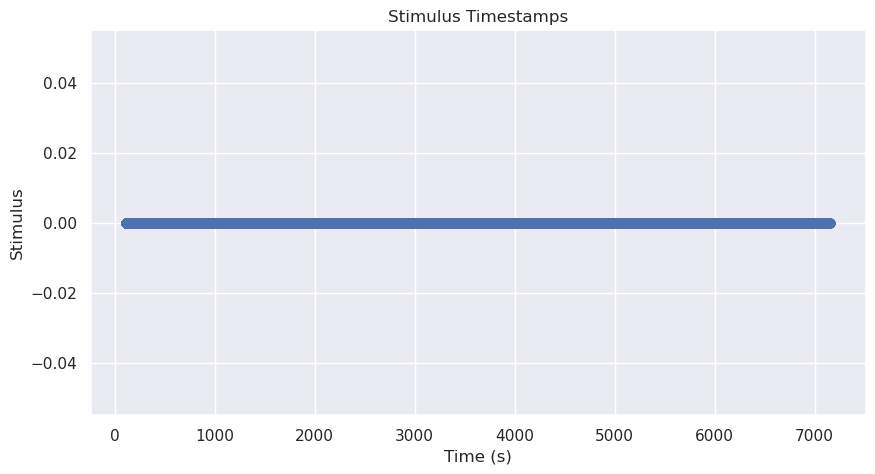

In [5]:
# Load stimulus timestamps
stimulus_timestamps = nwb.processing['stimulus'].data_interfaces['timestamps'].data[:]

# Plot the stimulus timestamps
plt.figure(figsize=(10, 5))
plt.plot(stimulus_timestamps, np.zeros_like(stimulus_timestamps), 'o')
plt.xlabel('Time (s)')
plt.ylabel('Stimulus')
plt.title('Stimulus Timestamps')
plt.show()

## Summary and future directions

This notebook provided an overview of Dandiset 000690 and demonstrated how to load and visualize data from an NWB file within the Dandiset.

Possible future directions for analysis include:

*   Analyzing the relationship between eye tracking data and running speed
*   Investigating the neural responses to different stimuli
*   Exploring the electrode group and unit data